## `Task` Do feature selection as per metods taught is session 54 on SECOM dataset.

Dataset Link : https://archive.ics.uci.edu/ml/datasets/SECOM

Drive Link : https://docs.google.com/spreadsheets/d/1dFCe1zgokabsiEr6BbWmMJtiMefkrChpJWLiG_0dDkk/edit?usp=share_link

In [81]:
# Write your Code here

### `Solution`

In [82]:
import pandas as pd

data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQtBXo5cBnDsM2fmfHPm6u72KGUS5FjPHNGMxOfYjA9-CAhmnRpwkIw_rOR3sANJIToiUU__6fbBvig/pub?gid=572763137&single=true&output=csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [83]:
data.shape

(1567, 592)

In [84]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [85]:
data['Pass/Fail'].value_counts()

,count
Pass/Fail,
-1,1463
1,104


Missing Values

In [86]:
data.isna().sum()

,0
Time,0
0,6
1,7
2,14
3,14
...,...
586,1
587,1
588,1
589,1


In [89]:
data['Time'] = pd.to_datetime(data['Time'])

data['year'] = data['Time'].dt.year
data['month'] = data['Time'].dt.month
data['day'] = data['Time'].dt.day
data['hour'] = data['Time'].dt.hour  # Optional

# Remove the original datetime column
data.drop(columns=['Time'], inplace=True)

In [90]:
for feature in data.columns:
  data[feature] = data[feature].fillna(data[feature].mean())

In [91]:
data.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
Pass/Fail,0
year,0
month,0
day,0


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [145]:
X = data.drop('Pass/Fail',axis=1)
y = data['Pass/Fail']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
print(X_train.shape)
print(X_test.shape)

(1253, 594)
(314, 594)


In [148]:
lr = LogisticRegression(max_iter=1000)

In [149]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [150]:
y_pred = lr.predict(X_test)

In [151]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9044585987261147


# 1. Removing duplicate column

In [152]:
def get_duplicate_columns(df):

    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns


In [153]:
duplicate_columns = get_duplicate_columns(X_train)

In [154]:
duplicate_columns

{'13': ['52',
  '97',
  '141',
  '149',
  '178',
  '179',
  '186',
  '189',
  '190',
  '191',
  '192',
  '193',
  '194',
  '226',
  '229',
  '230',
  '231',
  '232',
  '233',
  '234',
  '235',
  '236',
  '237',
  '240',
  '241',
  '242',
  '243',
  '256',
  '257',
  '258',
  '259',
  '260',
  '261',
  '262',
  '263',
  '264',
  '265',
  '266',
  '276',
  '284',
  '313',
  '314',
  '315',
  '322',
  '325',
  '326',
  '327',
  '328',
  '329',
  '330',
  '364',
  '369',
  '370',
  '371',
  '372',
  '373',
  '374',
  '375',
  '378',
  '379',
  '380',
  '381',
  '394',
  '395',
  '396',
  '397',
  '398',
  '399',
  '400',
  '401',
  '402',
  '403',
  '404',
  '414',
  '422',
  '449',
  '450',
  '451',
  '458',
  '461',
  '462',
  '463',
  '464',
  '465',
  '466',
  '481',
  '498',
  '501',
  '502',
  '503',
  '504',
  '505',
  '506',
  '507',
  '508',
  '509',
  '512',
  '513',
  '514',
  '515',
  '528',
  '529',
  '530',
  '531',
  '532',
  '533',
  '534',
  '535',
  '536',
  '537',
  '538

In [155]:
for one_list in duplicate_columns.values():
    X_train.drop(columns=one_list,inplace=True)
    X_test.drop(columns=one_list,inplace=True)

In [156]:
print(X_train.shape)
print(X_test.shape)

(1253, 482)
(314, 482)


# 2. Variance Threshold

In [157]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)
sel.fit(X_train)

VarianceThreshold(threshold=0.05)

In [158]:
sel.get_support()

array([ True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False,  True, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True, False,  True,  True, False, False,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False,  True, False,  True, False, False,
       False, False,  True, False, False,  True,  True, False,  True,
        True, False,

In [159]:
sum(sel.get_support())

np.int64(290)

In [160]:
columns = X_train.columns[sel.get_support()]

In [161]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [162]:
X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)

In [163]:
X_train.shape

(1253, 290)

# 3. Correlation

In [164]:
import seaborn as sns

<Axes: >

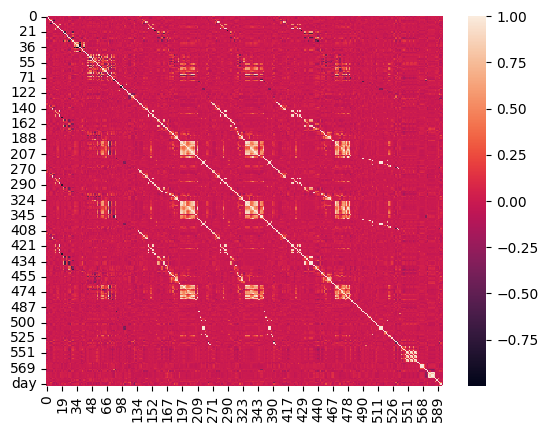

In [165]:
sns.heatmap(X_train.corr())

In [166]:
corr_matrix = X_train.corr()

In [167]:
# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))

159


In [168]:
columns_to_drop = set(columns_to_drop)

In [169]:
len(columns_to_drop)

94

In [170]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [171]:
print(X_train.shape)
print(X_test.shape)

(1253, 196)
(314, 196)


# 4. ANOVA


In [172]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [173]:
sel = SelectKBest(f_classif, k=100).fit(X_train,y_train)

In [174]:
X_train.columns[sel.get_support()]

Index(['0', '14', '19', '21', '22', '23', '27', '28', '31', '32', '33', '37',
       '38', '40', '46', '59', '61', '62', '63', '64', '65', '66', '67', '68',
       '70', '90', '110', '111', '115', '117', '122', '125', '126', '128',
       '129', '133', '134', '137', '138', '158', '159', '160', '164', '166',
       '180', '181', '182', '183', '188', '195', '196', '197', '198', '199',
       '200', '201', '203', '204', '205', '207', '218', '225', '250', '273',
       '316', '336', '337', '356', '417', '418', '423', '426', '430', '431',
       '433', '434', '439', '460', '468', '471', '476', '483', '484', '485',
       '488', '493', '494', '510', '511', '519', '521', '545', '546', '549',
       '550', '551', '561', '562', '569', '573'],
      dtype='object')

In [175]:
columns = X_train.columns[sel.get_support()]

In [176]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [177]:
print(X_train.shape)
print(X_test.shape)

(1253, 100)
(314, 100)


In [178]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.910828025477707


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
